# 第9回演習「主成分分析による次元削減 その1」

この演習では、多次元データの次元削減方法を習得します。<hr />

20名分の5科目の得点が以下の表のように与えられているものとして、次元削減を進めていきます。<br />
<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week9/Week9_fig0.png" style="width:200px"><br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
途中のどこかを飛ばすと、意図と違う挙動になります。

## 1) 全受験データを眺める

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
plt.figure(figsize = (8, 6)) # 図示の準備

# 各列は数学、理科、社会、英語、国語の順
全受験データ=np.array([[71,64,83,100,71],[34,48,67,57,68],[58,59,78,87,66],[41,51,70,60,72],[69,56,74,81,66],[64,65,82,100,71],[16,45,63,7,59],[59,59,78,59,62],[57,54,84,73,72],[46,54,71,43,62],[23,49,64,33,70],[39,48,71,29,66],[46,55,68,42,61],[52,56,82,67,60],[39,53,78,52,72],[23,43,63,35,59],[37,45,67,39,70],[52,51,74,65,69],[63,56,79,91,70],[39,49,73,64,60]])
np.set_printoptions(precision=2) # 小数点以下の桁数
受験者数=全受験データ.shape[0] # 全受験データの行数が受験者数である

教科=["数学","理科","社会","英語","国語"]
print(教科)
print("全科目の受験者ごとの素点")
print(全受験データ)

['数学', '理科', '社会', '英語', '国語']
全科目の受験者ごとの素点
[[ 71  64  83 100  71]
 [ 34  48  67  57  68]
 [ 58  59  78  87  66]
 [ 41  51  70  60  72]
 [ 69  56  74  81  66]
 [ 64  65  82 100  71]
 [ 16  45  63   7  59]
 [ 59  59  78  59  62]
 [ 57  54  84  73  72]
 [ 46  54  71  43  62]
 [ 23  49  64  33  70]
 [ 39  48  71  29  66]
 [ 46  55  68  42  61]
 [ 52  56  82  67  60]
 [ 39  53  78  52  72]
 [ 23  43  63  35  59]
 [ 37  45  67  39  70]
 [ 52  51  74  65  69]
 [ 63  56  79  91  70]
 [ 39  49  73  64  60]]


<Figure size 576x432 with 0 Axes>

## 2) 2つの科目だけを取り出して散布図を描く

数学 理科


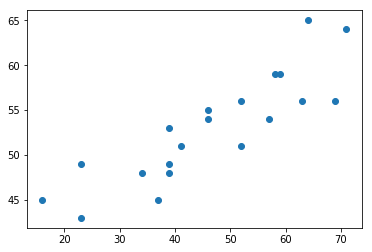

In [6]:
# 数学と理科でscatterplot
plt.scatter(全受験データ[:,0],全受験データ[:,1])
print(教科[0], 教科[1])
plt.show()

## 3) 散布図行列を描く

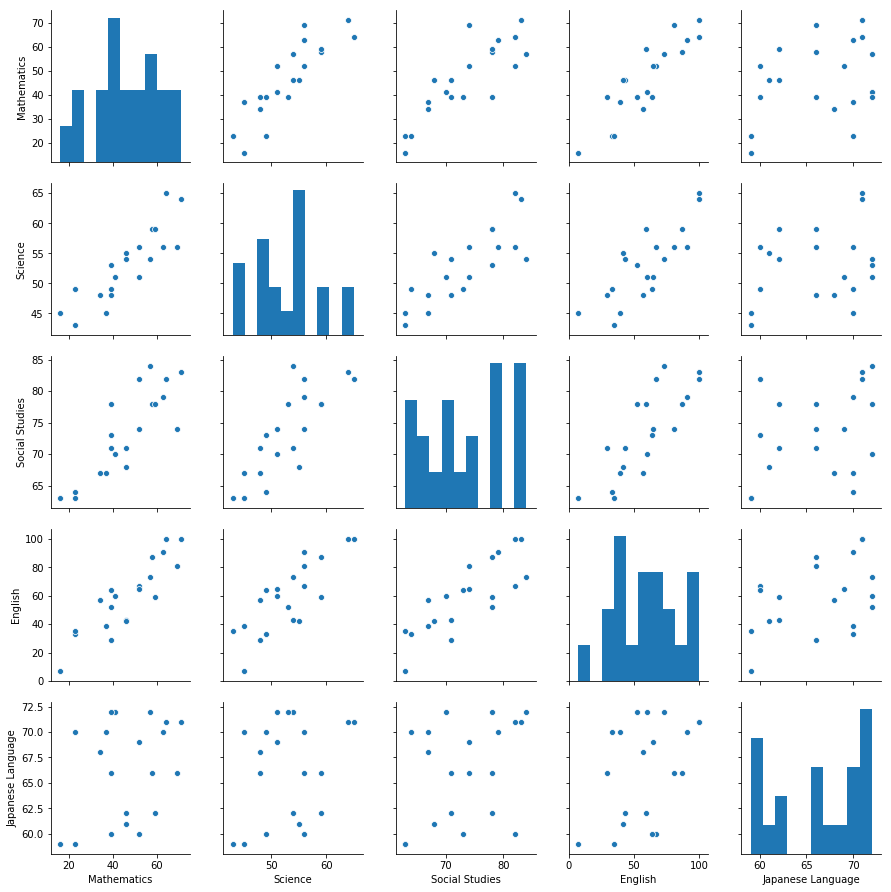

In [7]:
# Pandasライブラリのデータフレームを用意
df = pd.DataFrame(全受験データ,columns=["Mathematics", "Science","Social Studies","English","Japanese Language"])
# seaborn ライブラリの機能で散布図行列
sns.pairplot(df,height=2.5)

## 4) scikit-learn の PCAクラスを使い、インスタンスを作成

In [8]:
pca=PCA(n_components=2) # PCAのインスタンスを作る(2次元に落とす)
pca.fit(全受験データ) # 主成分分析(教師なし学習)

# 試しに平均を出力してみる
print("科目ごとの平均")
科目ごとの平均=pca.mean_
print(科目ごとの平均)

科目ごとの平均
[46.4  53.   73.45 59.2  66.3 ]


## 5) 主成分負荷量を得る

In [10]:
print("科目ごとの主成分負荷量")
# 主成分負荷量の符号が反転しても問題ないが、気になるようならマイナスを掛けよ
主成分負荷量 = -1*pca.components_[[0],:] # 第1主成分のみ

print(主成分負荷量) 

科目ごとの主成分負荷量
[[0.49 0.17 0.2  0.83 0.07]]


主成分負荷量と各科目の素点を表にまとめます。
<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week9/Week9_fig1.png" style="width:300px">


## 6) 分散を使い、科目ごとの性質を見る

In [11]:
# 列ごと、すなわち科目ごとの素点の分散を求める
print("科目ごとの素点の分散")
print(np.var(全受験データ, axis=0)) # 各列における分散。axis=1にすると各行における分散。

科目ごとの素点の分散
[231.24  34.4   44.35 591.46  22.21]


## 7) 受験者ごとの主成分得点を得る

In [12]:
print("受験者ごとの主成分の値(主成分得点)")
受験者ごとの主成分得点=全受験データ.dot(主成分負荷量.T)
print(受験者ごとの主成分得点)

受験者ごとの主成分の値(主成分得点)
[[149.94]
 [ 90.05]
 [130.6 ]
 [ 97.36]
 [129.74]
 [146.48]
 [ 37.88]
 [107.63]
 [119.24]
 [ 85.76]
 [ 64.5 ]
 [ 69.97]
 [ 84.45]
 [110.94]
 [ 91.66]
 [ 64.16]
 [ 76.24]
 [107.48]
 [136.32]
 [ 99.09]]


主成分負荷量、各科目の素点、主成分得点を表にまとめます。<br />
<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week9/Week9_fig2.png" style="width:300px">


## 8) 主成分得点と合計点を見て考える

In [13]:
print("受験番号、受験者ごとの素点、主成分得点、合計点")

for 受験番号 in range(受験者数):
    print(受験番号,全受験データ[受験番号],受験者ごとの主成分得点[受験番号],np.sum(全受験データ[受験番号]))

受験番号、受験者ごとの素点、主成分得点、合計点
0 [ 71  64  83 100  71] [149.94] 389
1 [34 48 67 57 68] [90.05] 274
2 [58 59 78 87 66] [130.6] 348
3 [41 51 70 60 72] [97.36] 294
4 [69 56 74 81 66] [129.74] 346
5 [ 64  65  82 100  71] [146.48] 382
6 [16 45 63  7 59] [37.88] 190
7 [59 59 78 59 62] [107.63] 317
8 [57 54 84 73 72] [119.24] 340
9 [46 54 71 43 62] [85.76] 276
10 [23 49 64 33 70] [64.5] 239
11 [39 48 71 29 66] [69.97] 253
12 [46 55 68 42 61] [84.45] 272
13 [52 56 82 67 60] [110.94] 317
14 [39 53 78 52 72] [91.66] 294
15 [23 43 63 35 59] [64.16] 223
16 [37 45 67 39 70] [76.24] 258
17 [52 51 74 65 69] [107.48] 311
18 [63 56 79 91 70] [136.32] 359
19 [39 49 73 64 60] [99.09] 285


## 9) 2名の受験者について比べる

In [14]:
print("受験番号1番と9番を比べます")
受験番号=1
print(受験番号,全受験データ[受験番号],受験者ごとの主成分得点[受験番号],np.sum(全受験データ[受験番号]))
受験番号=9
print(受験番号,全受験データ[受験番号],受験者ごとの主成分得点[受験番号],np.sum(全受験データ[受験番号]))

受験番号1番と9番を比べます
1 [34 48 67 57 68] [90.05] 274
9 [46 54 71 43 62] [85.76] 276


## 任意課題
9番の受験者は1番の受験者よりも合計点で上回っていますが、主成分得点では下回っています。
なぜこのようなことが起こるか、データを見ながら考えてください。

第9回第2章の演習はここまでです。引き続き、第3章の講義を見ましょう。